In [1]:
import librosa
import librosa.display
# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
x, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/audio_ml/lista_2/enunciado_corr.wav', sr = 16000, mono = False)

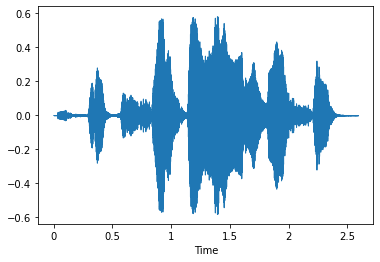

In [4]:
librosa.display.waveshow(x,sr)

In [6]:
from IPython.display import Audio
Audio('/content/drive/My Drive/Colab Notebooks/audio_ml/lista_2/enunciado_corr.wav')

In [7]:
x

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -9.1552734e-05, -3.0517578e-05,  3.0517578e-05], dtype=float32)

In [86]:
segment, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/audio_ml/lista_2/enunciado_corr.wav', sr = 16000, mono = False, offset=0.97, duration=0.02)

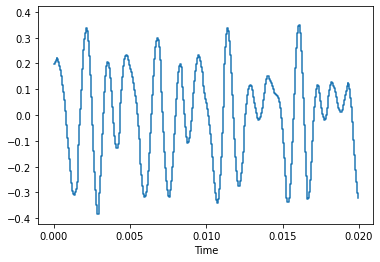

In [87]:
librosa.display.waveshow(segment,sr)

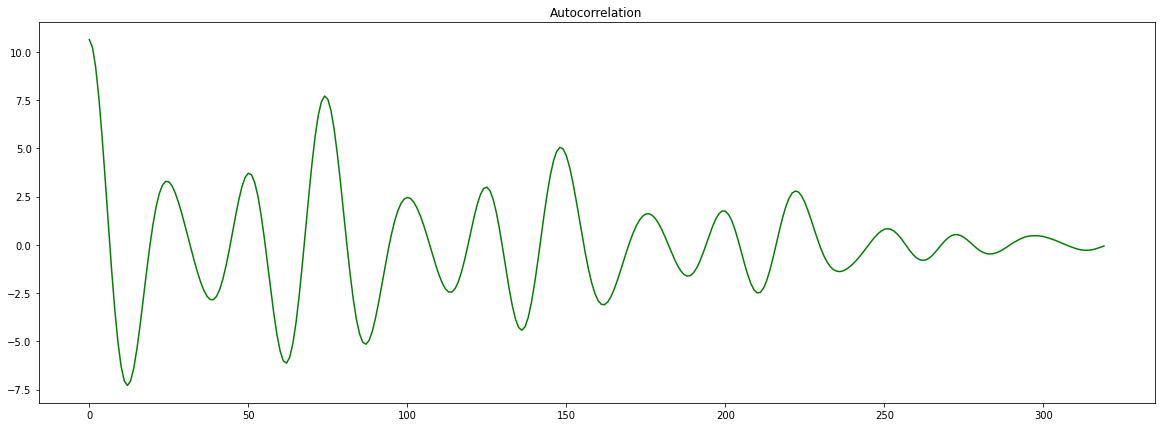

In [88]:
auto_cor=librosa.autocorrelate(segment) 
t = [i for i in range(len(auto_cor))]
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 7))

plt.plot(t, auto_cor, 'g')
plt.title('Autocorrelation')
plt.show()

In [89]:
from scipy.signal import find_peaks
peaks, di_peaks = find_peaks(auto_cor, height=0)

peaks

array([ 24,  50,  74, 100, 125, 148, 176, 199, 222, 251, 273, 297])

In [90]:
di_peaks

{'peak_heights': array([3.28438598, 3.70830929, 7.70672882, 2.45275469, 2.98724919,
        5.04908826, 1.60827801, 1.75219332, 2.78634574, 0.83452489,
        0.52565201, 0.47077876])}

In [91]:
def calc_f0_autocorr(seg, freq_sample):
  # Calcula a autocorrelacao
  autocorr = librosa.autocorrelate(seg) 
  # Encontra o segundo maximo
  peaks, di_peaks = find_peaks(auto_cor, height=0)
  sec_max = di_peaks['peak_heights'].max()
  print("O valor do segundo maximo e "+ str(sec_max))
  #encontra o lag
  local = list(di_peaks['peak_heights']).index(sec_max)
  lag = peaks[local]
  print("O valor do lag e "+str(lag))
  #estima f0
  f0 = freq_sample/lag

  return f0

In [92]:
print("A frequência fundamental é "+str(calc_f0_autocorr(segment, sr))+ " Hz")

O valor do segundo maximo e 7.706728820689018
O valor do lag e 74
A frequência fundamental é 216.21621621621622 Hz
